In [1]:
import torch
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torchvision import transforms
from engine.engine import *
from data.dataloader import *
from utils.data_utils import *
from models.cnn_model import *
from utils.helper_function import *

In [2]:
input_dir = "/Users/winirrr/Documents/EventBased_Project/raw_data/EB_data_1"
output_dir = "datasets/dif_duration_dataset_1"
results_dir = "./results"
os.makedirs(os.path.join(results_dir,"exp_11"), exist_ok=True)
result_dir = os.path.join(results_dir, "exp_11")

In [3]:
df_33 = create_file_label_dataframe(directory_path=os.path.join(output_dir,"33ms"))
df_22 = create_file_label_dataframe(directory_path=os.path.join(output_dir,"22ms"))
df_11 = create_file_label_dataframe(directory_path=os.path.join(output_dir,"11ms"))

In [4]:
print(f"Total images from slicing 33ms \n{df_33.label.value_counts()}")

Total images from slicing 33ms 
label
no_press    4350
press       3397
Name: count, dtype: int64


In [5]:
print(f"Total images from slicing 22ms \n{df_22.label.value_counts()}")

Total images from slicing 22ms 
label
no_press    6528
press       5101
Name: count, dtype: int64


In [6]:
print(f"Total images from slicing 11ms \n{df_11.label.value_counts()}")

Total images from slicing 11ms 
label
no_press    13060
press       10207
Name: count, dtype: int64


In [7]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize the images if needed
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),         # Convert images to tensor
    transforms.Normalize(mean=[0.485], std=[0.229])  # Normalize
])

#Hyperparameter
NUM_EPOCHS = 10
# NUM_WORKERS = os.cpu_count()
LR_RATE = 1e-3
BATCH_SIZE = 64

### Model_0

Train model with 33 ms sliced frame

In [8]:
train_dataloader_33, test_dataloader_33, classes_33 = create_dataloader(data_dir=os.path.join(output_dir,"33ms"),
                                                                        transform=transform,
                                                                        batch_size=BATCH_SIZE)

Number of classes: 2
Class to index mapping: {'no_press': 0, 'press': 1}
Total number of images: 7747
Number of training images: 6197
Number of test images: 1550
Training DataLoader:
torch.Size([64, 1, 32, 32]) torch.Size([64])
Test DataLoader:
torch.Size([64, 1, 32, 32]) torch.Size([64])
Number of training batches: 97
Number of test batches: 25


In [9]:
from timeit import default_timer as timer
# Set random seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)



# early_stopping = EarlyStopping(patience=5)

# Device agnostic
device= ("cuda" if torch.cuda.is_available() else "cpu")

# Implement model
model_0 = LeNet()


# Implement loss function and optimizer
loss_fn =  torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=LR_RATE,
                             weight_decay=1e-4)



scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
early_stopping = EarlyStopping(patience=5)


start_time = timer()
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_33,
                        test_dataloader=test_dataloader_33,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device,
                        early_stopping=early_stopping,
                        scheduler=scheduler
                        )

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epochs: 0 | train_loss : 0.4679 | train_acc: 85.93% | test_loss : 0.1358| test_acc: 95.12%
Epochs: 1 | train_loss : 0.0900 | train_acc: 96.83% | test_loss : 0.0774| test_acc: 97.31%
Epochs: 2 | train_loss : 0.0635 | train_acc: 97.82% | test_loss : 0.0475| test_acc: 98.19%
Epochs: 3 | train_loss : 0.0530 | train_acc: 98.24% | test_loss : 0.0355| test_acc: 99.00%
Epochs: 4 | train_loss : 0.0318 | train_acc: 99.01% | test_loss : 0.0347| test_acc: 98.81%
Epochs: 5 | train_loss : 0.0248 | train_acc: 99.26% | test_loss : 0.0220| test_acc: 99.56%
Epochs: 6 | train_loss : 0.0349 | train_acc: 99.03% | test_loss : 0.0226| test_acc: 99.44%
Epochs: 7 | train_loss : 0.0197 | train_acc: 99.57% | test_loss : 0.0215| test_acc: 99.44%
Epochs: 8 | train_loss : 0.0188 | train_acc: 99.57% | test_loss : 0.0214| test_acc: 99.44%
Epochs: 9 | train_loss : 0.0183 | train_acc: 99.58% | test_loss : 0.0206| test_acc: 99.50%
Total training time: 751.403 seconds


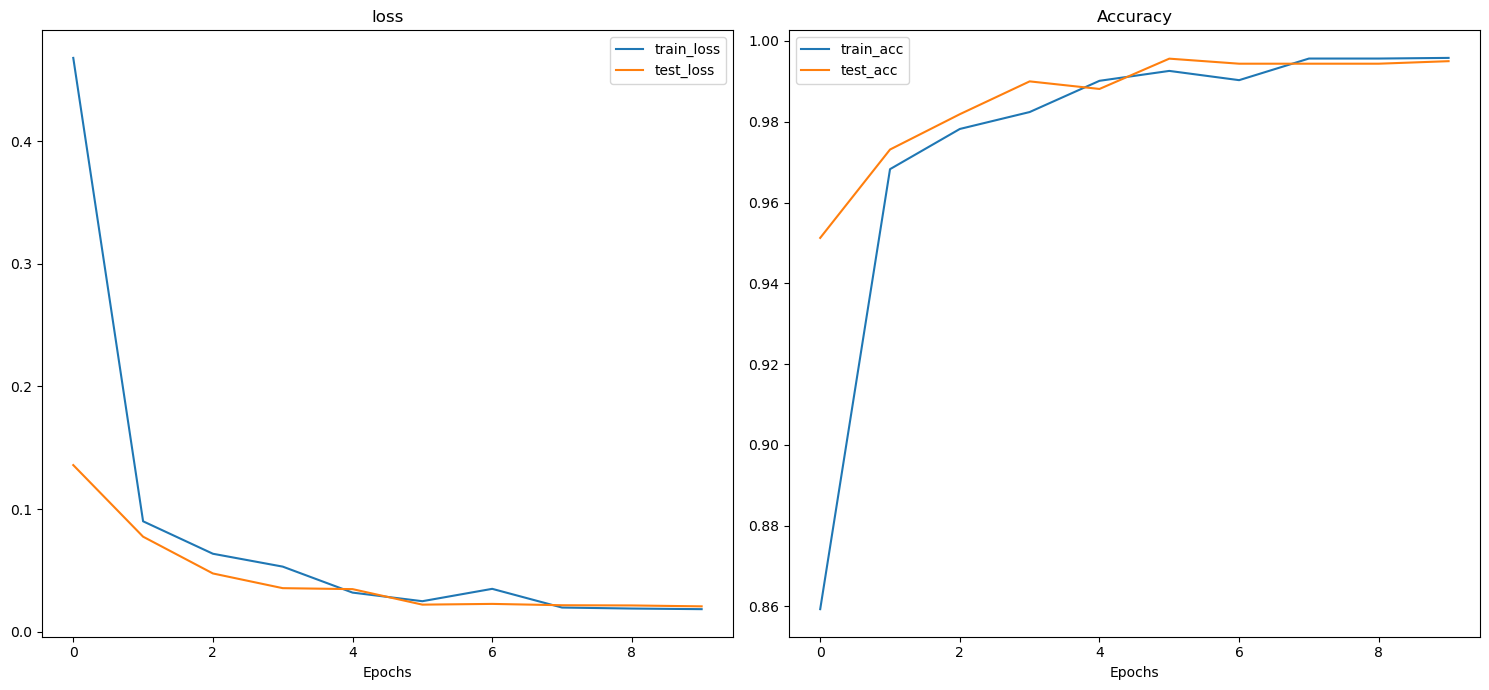

In [10]:
plot_loss_curves(model_0_results)

In [11]:
# Convert the results to a DataFrame and save it as a CSV file
model_0_df = pd.DataFrame(model_0_results)
model_0_df.to_csv(os.path.join(result_dir, "dv_df_33ms_1.csv"), index=False)

In [12]:
# # Path to the CSV file
# csv_file_path = os.path.join(results_dir, "dv_df_33ms_1.csv")

# # Read the CSV file into a DataFrame
# df = pd.read_csv(csv_file_path)

# # Convert the DataFrame to a dictionary
# data_dict = df.to_dict(orient='list')

# print(data_dict)

### Model_1
Train model with 22ms sliced frame

In [13]:
train_dataloader_22, test_dataloader_22, classes_22 = create_dataloader(data_dir=os.path.join(output_dir,"22ms"),
                                                                        transform=transform,
                                                                        batch_size=BATCH_SIZE,)

Number of classes: 2
Class to index mapping: {'no_press': 0, 'press': 1}
Total number of images: 11629
Number of training images: 9303
Number of test images: 2326
Training DataLoader:
torch.Size([64, 1, 32, 32]) torch.Size([64])
Test DataLoader:
torch.Size([64, 1, 32, 32]) torch.Size([64])
Number of training batches: 146
Number of test batches: 37


In [14]:
from timeit import default_timer as timer
# Set random seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)



# early_stopping = EarlyStopping(patience=5)

# Device agnostic
device= ("cuda" if torch.cuda.is_available() else "cpu")


scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
early_stopping = EarlyStopping(patience=5)
# Implement model
model_1 = LeNet()


# Implement loss function and optimizer
loss_fn =  torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=LR_RATE,
                             weight_decay=1e-4)

start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_22,
                        test_dataloader=test_dataloader_22,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device,
                        early_stopping=early_stopping,
                        scheduler=scheduler
                        )

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epochs: 0 | train_loss : 0.3479 | train_acc: 88.57% | test_loss : 0.0832| test_acc: 97.01%


/Users/winirrr/pytorch-test/env/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epochs: 1 | train_loss : 0.0801 | train_acc: 97.17% | test_loss : 0.0604| test_acc: 97.60%
Epochs: 2 | train_loss : 0.0455 | train_acc: 98.47% | test_loss : 0.0496| test_acc: 98.91%
Epochs: 3 | train_loss : 0.0265 | train_acc: 99.19% | test_loss : 0.0150| test_acc: 99.58%
Epochs: 4 | train_loss : 0.0206 | train_acc: 99.37% | test_loss : 0.0096| test_acc: 99.75%
Epochs: 5 | train_loss : 0.0161 | train_acc: 99.59% | test_loss : 0.0159| test_acc: 99.58%
Epochs: 6 | train_loss : 0.0146 | train_acc: 99.54% | test_loss : 0.0076| test_acc: 99.87%
Epochs: 7 | train_loss : 0.0145 | train_acc: 99.64% | test_loss : 0.0055| test_acc: 99.92%
Epochs: 8 | train_loss : 0.0196 | train_acc: 99.46% | test_loss : 0.0193| test_acc: 99.32%
Epochs: 9 | train_loss : 0.0145 | train_acc: 99.62% | test_loss : 0.0067| test_acc: 99.87%
Total training time: 882.325 seconds


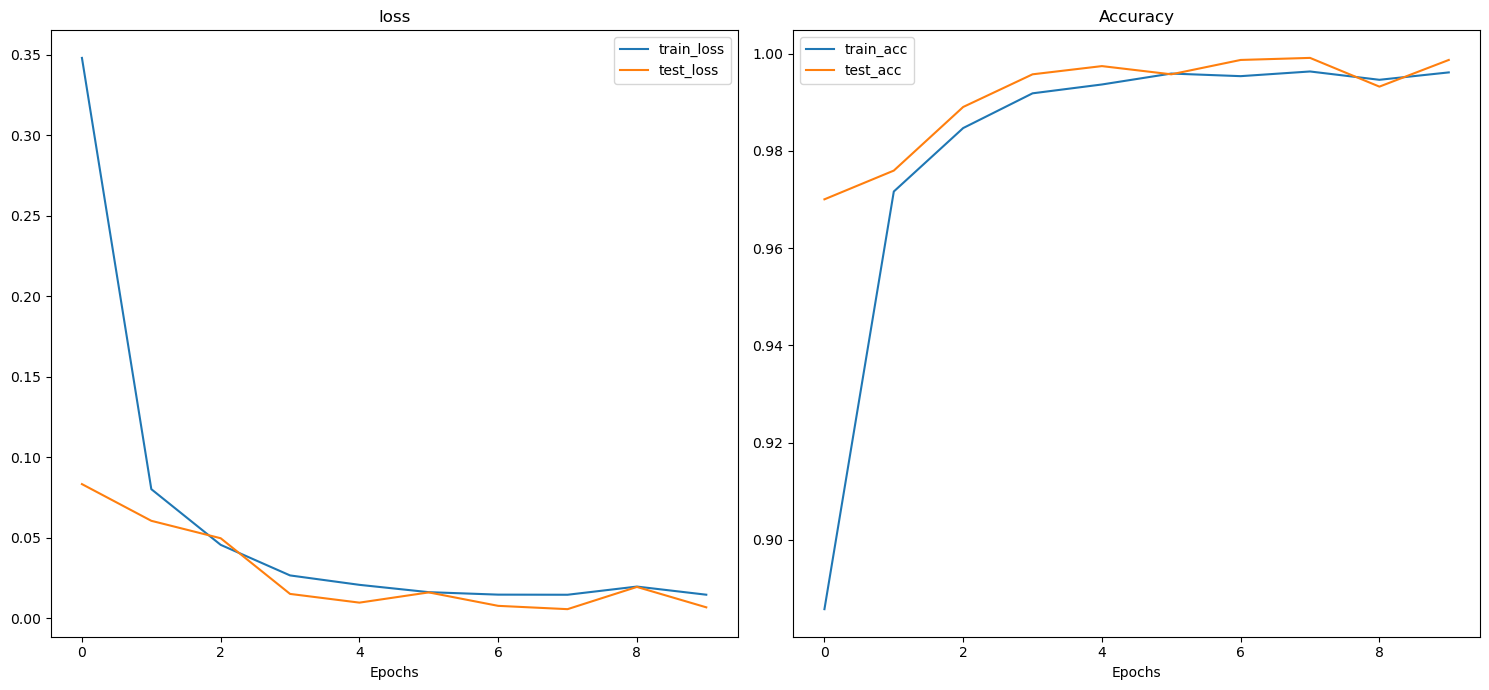

In [15]:
plot_loss_curves(model_1_results)

In [16]:
# Convert the results to a DataFrame and save it as a CSV file
model_1_df = pd.DataFrame(model_1_results)
model_1_df.to_csv(os.path.join(results_dir, "dv_df_22ms_1.csv"), index=False)

### Model_2
Train model with 11ms sliced frame

In [17]:
train_dataloader_11, test_dataloader_11, classes_11 = create_dataloader(data_dir=os.path.join(output_dir,"11ms"),
                                                                        transform=transform,
                                                                        batch_size=BATCH_SIZE,)

Number of classes: 2
Class to index mapping: {'no_press': 0, 'press': 1}
Total number of images: 23267
Number of training images: 18613
Number of test images: 4654
Training DataLoader:
torch.Size([64, 1, 32, 32]) torch.Size([64])
Test DataLoader:
torch.Size([64, 1, 32, 32]) torch.Size([64])
Number of training batches: 291
Number of test batches: 73


In [18]:
from timeit import default_timer as timer
# Set random seeds
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)



# early_stopping = EarlyStopping(patience=5)

# Device agnostic
device= ("cuda" if torch.cuda.is_available() else "cpu")

# Implement model
model_2 = LeNet()


# Implement loss function and optimizer
loss_fn =  torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),
                             lr=LR_RATE,
                             weight_decay=1e-4)


scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
early_stopping = EarlyStopping(patience=5)


start_time = timer()

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader_11,
                        test_dataloader=test_dataloader_11,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device,
                        early_stopping=early_stopping,
                        scheduler=scheduler
                        )

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epochs: 0 | train_loss : 0.2461 | train_acc: 90.54% | test_loss : 0.0523| test_acc: 98.06%
Epochs: 1 | train_loss : 0.0365 | train_acc: 98.80% | test_loss : 0.0211| test_acc: 99.51%
Epochs: 2 | train_loss : 0.0196 | train_acc: 99.43% | test_loss : 0.0127| test_acc: 99.68%
Epochs: 3 | train_loss : 0.0158 | train_acc: 99.53% | test_loss : 0.0101| test_acc: 99.72%
Epochs: 4 | train_loss : 0.0128 | train_acc: 99.68% | test_loss : 0.0114| test_acc: 99.66%
Epochs: 5 | train_loss : 0.0121 | train_acc: 99.70% | test_loss : 0.0092| test_acc: 99.79%
Epochs: 6 | train_loss : 0.0123 | train_acc: 99.66% | test_loss : 0.0174| test_acc: 99.44%
Epochs: 7 | train_loss : 0.0105 | train_acc: 99.71% | test_loss : 0.0087| test_acc: 99.79%
Epochs: 8 | train_loss : 0.0092 | train_acc: 99.74% | test_loss : 0.0083| test_acc: 99.81%
Epochs: 9 | train_loss : 0.0086 | train_acc: 99.75% | test_loss : 0.0080| test_acc: 99.79%
Total training time: 1297.252 seconds


In [19]:
# plot_loss_curves(model_2_results)

In [20]:
# Convert the results to a DataFrame and save it as a CSV file
model_2_df = pd.DataFrame(model_2_results)
model_2_df.to_csv(os.path.join(result_dir, "dv_df_11ms_1.csv"), index=False)